# Examples

## Parameters

In [59]:
import pandas as pd
import numpy as np
import pyOptions
import time
import datetime as dt
import matplotlib.pyplot as plt

#Options parameters
S = 200
K = 220
T = 2*252
sigma = 0.25
r = 0.05
typ = 'C'
div = 0.03

## Black & Scholes

In [24]:
BS = pyOptions.Black_Scholes()

opt_price = BS.pricing(S, K, T, r, sigma, typ)
print('Price with no dividends : {price:.2f}'.format(price=opt_price))

opt_price_div = BS.pricing(S, K, T, r, sigma, typ, div)
print('Price with dividends : {price:.2f} \n'.format(price=opt_price_div))

iv = BS.implied_vol(S, K, T, r, typ, opt_price)
print('Implied volatility with no dividends : {iv:.2%}'.format(iv=iv))

iv_div = BS.implied_vol(S, K, T, r, typ, opt_price_div, div)
print('Implied volatility with dividends : {iv:.2%} \n'.format(iv=iv_div))

delta, gamma, theta, vega = BS.greeks(S, K, T, r, sigma, typ, greek='all')
print('Delta with no div : {greek:.3f}'.format(greek=delta))
print('Gamma with no div : {greek:.3f}'.format(greek=float(gamma)))
print('Theta with no div : {greek:.3f}'.format(greek=float(theta)))
print('Vega with no div : {greek:.3f} \n'.format(greek=float(vega)))

delta_div, gamma_div, theta_div, vega_div = BS.greeks(S, K, T, r, sigma, typ, div, greek='all')
print('Delta with div : {greek:.3f}'.format(greek=delta_div))
print('Gamma with div : {greek:.3f}'.format(greek=gamma_div))
print('Theta with div : {greek:.3f}'.format(greek=theta_div))
print('Vega with div : {greek:.3f}'.format(greek=vega_div))

Price with no dividends : 28.47
Price with dividends : 22.15 

Implied volatility with no dividends : 25.00%
Implied volatility with dividends : 25.00% 

Delta with no div : 0.575
Gamma with no div : 0.006
Theta with no div : -0.045
Vega with no div : 1.108 

Delta with div : 0.479
Gamma with div : 0.005
Theta with div : -0.030
Vega with div : 1.062


## Binomial Trees

In [9]:
BT = pyOptions.Binomial_Tree()

opt_price1 = BT.pricing(S, K, T, r, sigma, typ, american=False, time_steps=1000)
print('European call price with no dividends : {price:.2f}'.format(price=opt_price1))

opt_price2 = BT.pricing(S, K, T, r, sigma, typ, american=True, time_steps=1000)
print('American call price with no dividends : {price:.2f}'.format(price=opt_price2))

opt_price3 = BT.pricing(S, K, T, r, sigma, 'P', american=False)
print('European put price with no dividends : {price:.2f}'.format(price=opt_price3))

opt_price4 = BT.pricing(S, K, T, r, sigma, 'P', american=True)
print('American put price with no dividends : {price:.2f} \n'.format(price=opt_price4))

iv = BT.implied_vol(S, K, T, r, 'P', opt_price4, american=True)
print('Implied volatility american put with no dividends : {iv:.2%} \n'.format(iv=iv)) 

delta, gamma, theta, vega = BT.greeks(S, K, T, r, sigma, typ, greek='all', american=True)
print('American call delta with no div : {greek:.3f}'.format(greek=delta))
print('American call gamma with no div : {greek:.3f}'.format(greek=gamma))
print('American call theta with no div : {greek:.3f}'.format(greek=theta))
print('American call vega with no div : {greek:.3f}'.format(greek=vega))

European call price with no dividends : 28.47
American call price with no dividends : 28.47
European put price with no dividends : 27.53
American put price with no dividends : 31.57 

Implied volatility american put with no dividends : 25.00% 

American call delta with no div : 0.570
American call gamma with no div : 0.005
American call theta with no div : -0.045
American call vega with no div : 1.104


## Monte Carlo

In [41]:
MC = pyOptions.Monte_Carlo()

#(Optional) All simulations will be base on same random generation pattern
random_seed = int(time.time())

opt_price = MC.pricing(S, K, T, r, sigma, typ, iterations=100000, time_steps=100, random_seed=random_seed)
print('Price with no dividends : {price:.2f}'.format(price=opt_price))

opt_price_div = MC.pricing(S, K, T, r, sigma, typ, div, random_seed=random_seed)
print('Price with dividends : {price:.2f} \n'.format(price=opt_price_div))

iv = MC.implied_vol(S, K, T, r, typ, opt_price, random_seed=random_seed)
print('Implied volatility with no dividends : {iv:.2%}'.format(iv=iv))

iv_div = MC.implied_vol(S, K, T, r, typ, opt_price_div, div, random_seed=random_seed)
print('Implied volatility with dividends : {iv:.2%} \n'.format(iv=iv_div))

delta, gamma, theta, vega = MC.greeks(S, K, T, r, sigma, typ, greek='all', random_seed=random_seed)
print('Delta with no div : {greek:.3f}'.format(greek=delta))
print('Gamma with no div : {greek:.3f}'.format(greek=float(gamma)))
print('Theta with no div : {greek:.3f}'.format(greek=float(theta)))
print('Vega with no div : {greek:.3f} \n'.format(greek=float(vega)))

delta_div, gamma_div, theta_div, vega_div = MC.greeks(S, K, T, r, sigma, typ, div, greek='all', random_seed=random_seed)
print('Delta with div : {greek:.3f}'.format(greek=delta_div))
print('Gamma with div : {greek:.3f}'.format(greek=gamma_div))
print('Theta with div : {greek:.3f}'.format(greek=theta_div))
print('Vega with div : {greek:.3f}'.format(greek=vega_div))


Price with no dividends : 28.18
Price with dividends : 21.90 

Implied volatility with no dividends : 25.00%
Implied volatility with dividends : 25.00% 

Delta with no div : 0.572
Gamma with no div : 0.006
Theta with no div : -0.044
Vega with no div : 1.094 

Delta with div : 0.475
Gamma with div : 0.005
Theta with div : -0.029
Vega with div : 1.049


# Vector performance

In [21]:
VECT_LENGTH = 1000

S_array = np.array([S for i in range(VECT_LENGTH)])
K_array = np.array([K for i in range(VECT_LENGTH)])
T_array = np.array([T for i in range(VECT_LENGTH)])
sigma_array = np.array([sigma for i in range(VECT_LENGTH)])
r_array = np.array([r for i in range(VECT_LENGTH)])
typ_array = np.array([typ for i in range(VECT_LENGTH)])
div_array = np.array([div for i in range(VECT_LENGTH)])

## Black Scholes

In [27]:
BS = pyOptions.Black_Scholes()

t_begin = time.time()
opt_price = BS.pricing(S_array, K_array, T_array, r_array, sigma_array, typ_array, div_array)
t_end = time.time()
print('BS pricing processed {length:.0f} options in {dur:.0f} ms.'.format(length=VECT_LENGTH, dur=(t_end-t_begin)*1000))

t_begin = time.time()
iv = BS.implied_vol(S_array, K_array, T_array, r_array, typ_array, opt_price, div_array)
t_end = time.time()
print('BS iv processed {length:.0f} options in {dur:.0f} ms.'.format(length=VECT_LENGTH, dur=(t_end-t_begin)*1000))

t_begin = time.time()
delta, gamma, theta, vega = BS.greeks(S_array, K_array, T_array, r_array, sigma_array, typ_array, div_array)
t_end = time.time()
print('BS greeks processed {length:.0f} options in {dur:.0f} ms.'.format(length=VECT_LENGTH, dur=(t_end-t_begin)*1000))

BS pricing processed 1000 options in 1 ms.
BS iv processed 1000 options in 669 ms.
BS greeks processed 1000 options in 1 ms.


## Binomial Trees

In [42]:
BT = pyOptions.Binomial_Tree()

TIME_STEPS = 500

t_begin = time.time()
opt_price = BT.pricing(S_array, K_array, T_array, r_array, sigma_array, typ_array, div_array, time_steps=TIME_STEPS)
t_end = time.time()
print('BT pricing processed {length:.0f} options in {dur:.0f} ms.'.format(length=VECT_LENGTH, dur=(t_end-t_begin)*1000))

t_begin = time.time()
iv = BT.implied_vol(S_array, K_array, T_array, r_array, typ_array, opt_price, div_array, time_steps=TIME_STEPS)
t_end = time.time()
print('BT iv processed {length:.0f} options in {dur:.0f} ms.'.format(length=VECT_LENGTH, dur=(t_end-t_begin)*1000))

t_begin = time.time()
delta, gamma, theta, vega = BT.greeks(S_array, K_array, T_array, r_array, sigma_array, typ_array, div_array, time_steps=TIME_STEPS)
t_end = time.time()
print('BT greeks processed {length:.0f} options in {dur:.0f} ms.'.format(length=VECT_LENGTH, dur=(t_end-t_begin)*1000))

BT pricing processed 1000 options in 2874 ms.
BT iv processed 1000 options in 23820 ms.
BT greeks processed 1000 options in 28205 ms.


## Monte Carlo

In [34]:
MC = pyOptions.Monte_Carlo()

ITERATIONS = 1000
TIME_STEPS = 50
RANDOM_SEED = int(time.time())

t_begin = time.time()
opt_price = MC.pricing(S_array, K_array, T_array, r_array, sigma_array, typ_array, div_array, iterations=ITERATIONS, time_steps=TIME_STEPS, random_seed=RANDOM_SEED)
t_end = time.time()
print('MC pricing processed {length:.0f} options in {dur:.0f} ms.'.format(length=VECT_LENGTH, dur=(t_end-t_begin)*1000))

t_begin = time.time()
iv = MC.implied_vol(S_array, K_array, T_array, r_array, typ_array, opt_price, div_array, iterations=ITERATIONS, time_steps=TIME_STEPS, random_seed=RANDOM_SEED)
t_end = time.time()
print('MC iv processed {length:.0f} options in {dur:.0f} ms.'.format(length=VECT_LENGTH, dur=(t_end-t_begin)*1000))

t_begin = time.time()
delta, gamma, theta, vega = MC.greeks(S_array, K_array, T_array, r_array, sigma_array, typ_array, div_array, iterations=ITERATIONS, time_steps=TIME_STEPS, random_seed=RANDOM_SEED)
t_end = time.time()
print('MC greeks processed {length:.0f} options in {dur:.0f} ms.'.format(length=VECT_LENGTH, dur=(t_end-t_begin)*1000))

MC pricing processed 1000 options in 1603 ms.
MC iv processed 1000 options in 4776 ms.
MC greeks processed 1000 options in 16597 ms.


## Days to maturity (NYSE)

In [54]:
VECT_LENGTH = 1000

expiration = dt.datetime.strptime('8/15/2020', '%m/%d/%Y')
expiration_array = np.array([expiration for i in range(VECT_LENGTH)])

# Simple
days_remaining = pyOptions.days_to_maturity(expiration)

# Vectorized
days_remaining = pyOptions.days_to_maturity(expiration_array)

## Random walk

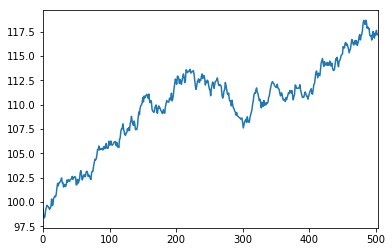

In [67]:
stock_simulated = pyOptions.random_walk_generator(mu=0.10, sigma=0.05, S0=100, T=2)
stock_simulated.plot()
plt.show()

## Statistics backtest

In [70]:
returns_simulated = stock_simulated.pct_change().dropna()
NOTIONNAL= 100000
pyOptions.statistics_backtest(NOTIONNAL * returns_simulated)

{'avg_pnl': 33.474944500508855,
 'max_drawdown': -5407.4252657000725,
 'max_drawdown_begin': 221,
 'max_drawdown_end': 301,
 'max_pnl': 1031.0854184457207,
 'mdn_pnl': 29.515536772661832,
 'min_pnl': -761.08109214232388,
 'proba_up': 0.5427435387673957,
 'sharpe': 1.683991016930604,
 'sortino': 3.0739093013735892,
 'std_pnl': 315.55885064564615,
 'total_pnl': 16837.897083755954}